In [1]:
from ecd import get_inputs

event, quest = 2025, 9

## Part 1

In [4]:
data1 = get_inputs(event=event, quest=quest)['1']

scales1 = {}

for d in data1.split('\n'):
    ident, _, scale = d.partition(':')
    scales1[ident] = scale

In [10]:
from collections import Counter
from math import prod

uniqueness = set(scales1.keys())

locations = list(scales1.keys())

for z in zip(*scales1.values()):
    if len(uniqueness) == 1:
        break
    check = Counter(z)

    if len(result := check.most_common()) == 2:
        unique = result[1][0]
        whois = z.index(unique)
        uniqueness.discard(locations[whois])

parents = set(locations).difference(uniqueness)
child = uniqueness.pop()

ans1 = Counter()

for x in range(len(scales1[child])):
    for p in parents:
        if scales1[child][x] == scales1[p][x]:
            ans1[p] += 1

print(prod(ans1.values()))

6715


## Part 2

In [13]:
data2 = get_inputs(event=event, quest=quest)['2']

scales2 = {}

for d in data2.split('\n'):
    ident, _, scale = d.partition(':')
    scales2[ident] = scale

In [39]:
from collections import Counter
from math import prod

def find_child(scales, candidates, non_children=set()):

    uniqueness = set(candidates).difference(non_children)

    for z in zip(*[scales[c] for c in candidates]):
        check = Counter(z)

        if len(result := check.most_common()) == 2:
            unique = result[1][0]
            whois = z.index(unique)
            uniqueness.discard(candidates[whois])

        if len(uniqueness) < 1:
            break

    if len(uniqueness) != 1:
        return False

    parents = set(candidates).difference(uniqueness)
    child = uniqueness.pop()

    return (child, parents)

def find_similarity(scales, child, parents):
    ans = Counter()

    for x in range(len(scales[child])):
        for p in parents:
            if scales[child][x] == scales[p][x]:
                ans[p] += 1

    return prod(ans.values())

In [34]:
from itertools import combinations

finish2 = []

for cs in combinations(scales2.keys(), 3):
    print(cs, end='\r')
    if (result := find_child(scales2, cs)):
        finish2.append(result)

print('\n', sum(find_similarity(scales2, child, parents) for child, parents in finish2))

('98', '99', '100')
 318590


In [30]:
finish2

[('38', {'1', '6'}),
 ('46', {'1', '6'}),
 ('37', {'15', '2'}),
 ('66', {'15', '2'}),
 ('31', {'10', '3'}),
 ('68', {'10', '3'}),
 ('11', {'35', '4'}),
 ('14', {'35', '4'}),
 ('5', {'28', '57'}),
 ('7', {'41', '78'}),
 ('8', {'47', '61'}),
 ('52', {'87', '9'}),
 ('89', {'87', '9'}),
 ('16', {'12', '99'}),
 ('94', {'12', '99'}),
 ('25', {'13', '24'}),
 ('82', {'13', '24'}),
 ('17', {'20', '45'}),
 ('18', {'84', '96'}),
 ('19', {'71', '86'}),
 ('33', {'20', '45'}),
 ('63', {'21', '67'}),
 ('69', {'21', '67'}),
 ('22', {'39', '65'}),
 ('23', {'84', '96'}),
 ('49', {'26', '60'}),
 ('90', {'26', '60'}),
 ('34', {'27', '95'}),
 ('98', {'27', '95'}),
 ('81', {'28', '57'}),
 ('62', {'29', '32'}),
 ('70', {'29', '32'}),
 ('40', {'30', '48'}),
 ('93', {'30', '48'}),
 ('36', {'77', '85'}),
 ('79', {'39', '65'}),
 ('73', {'41', '78'}),
 ('42', {'100', '51'}),
 ('43', {'64', '91'}),
 ('44', {'77', '85'}),
 ('88', {'47', '61'}),
 ('50', {'59', '75'}),
 ('97', {'100', '51'}),
 ('53', {'59', '75'}),
 

## Part 3

In [35]:
data3 = get_inputs(event=event, quest=quest)['3']

scales3 = {}

for d in data3.split('\n'):
    ident, _, scale = d.partition(':')
    scales3[ident] = scale

In [41]:
from itertools import combinations

finish3 = []

skip3 = set()

nc = set()

for cs in combinations(scales3.keys(), 3):
    for c in combinations(cs, 2):
        if c in skip3:
            continue
    # print(cs, end='\r')
    if (result := find_child(scales3, cs, nc)):
        print(result)
        finish3.append(result)
        skip3.update({tuple(sorted([result[0], p])) for p in result[1]})
        nc.add(result[0])

('411', {'117', '4'})
('243', {'368', '4'})
('416', {'281', '4'})
('466', {'184', '5'})
('237', {'322', '5'})
('10', {'410', '21'})
('120', {'121', '11'})
('181', {'11', '308'})
('11', {'373', '187'})
('111', {'66', '12'})
('12', {'140', '421'})
('170', {'182', '12'})
('171', {'252', '13'})
('194', {'420', '13'})
('268', {'402', '13'})
('393', {'13', '359'})
('102', {'14', '218'})
('14', {'102', '287'})
('15', {'413', '423'})
('447', {'16', '155'})
('189', {'16', '339'})
('251', {'16', '457'})
('121', {'210', '17'})
('17', {'476', '216'})
('19', {'34', '255'})
('41', {'20', '329'})
('20', {'321', '187'})
('200', {'48', '21'})
('90', {'452', '21'})
('465', {'78', '22'})
('174', {'222', '22'})
('160', {'23', '130'})
('331', {'23', '169'})
('23', {'196', '476'})
('24', {'411', '165'})
('182', {'431', '24'})
('136', {'158', '27'})
('27', {'365', '177'})
('28', {'150', '402'})
('250', {'275', '31'})
('344', {'31', '253'})
('178', {'268', '32'})
('32', {'252', '247'})
('230', {'34', '65'})
(

In [42]:
len(finish3)

215

In [43]:
import networkx as nx

DG = nx.DiGraph()

for child, parents in finish3:
    for parent in parents:
        DG.add_edge(child, parent)

In [52]:
comps = sorted([comp for comp in nx.connected_components(DG.to_undirected())], key= lambda x: -len(x))

In [57]:
resultdict3 = dict(finish3)

sum([int(c) for c in comps[0]])

78136

AttributeError: 'set' object has no attribute 'is_directed'

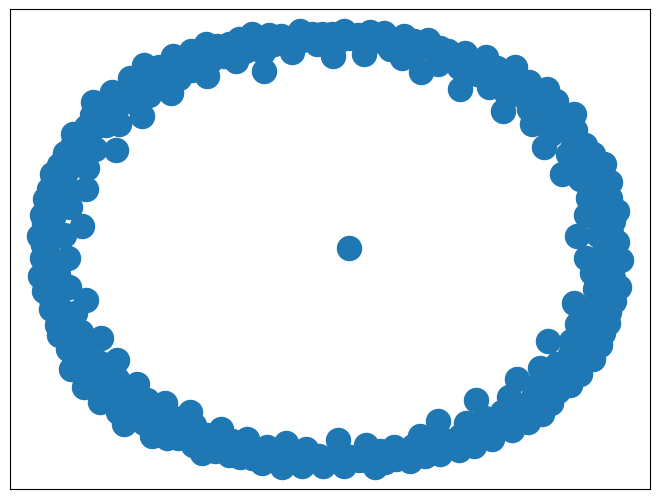

In [59]:
nx.draw(comps[0], with_labels=True)